<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/ML14_K_najbli%C5%BCszych_s%C4%85siad%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.random.seed(42)

#Wczytanie danych

In [ ]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
all_data = raw_data.copy()
data = all_data['data']
target = all_data['target']

print(f'{data[:5]}\n')
print(f'{target[:5]}\n')

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

[0 0 0 0 0]



In [ ]:
df = pd.DataFrame(data=np.c_[data, target], columns=all_data['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

#Wykres rozproszenia

In [ ]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

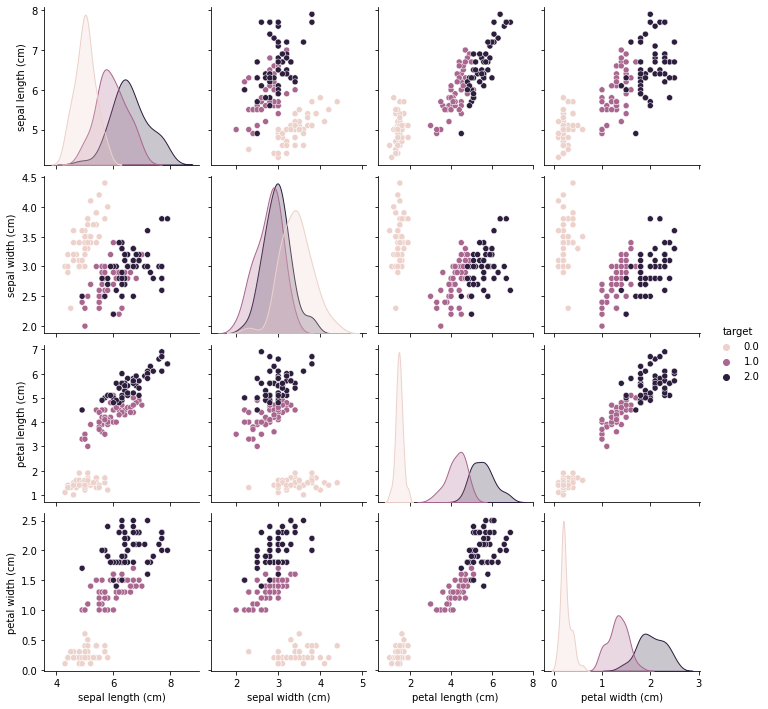

In [ ]:
_ = sns.pairplot(df, vars=all_data['feature_names'], hue='target')

##Wycięcie dwóch pierwszych kolumn

In [ ]:
# Wycięcie dwóch pierwszych kolumn
data = data[:, :2]
print('Data shape: ', data.shape)
print('Target shape: ', target.shape)

Data shape:  (150, 2)
Target shape:  (150,)


##Wykres punktowy

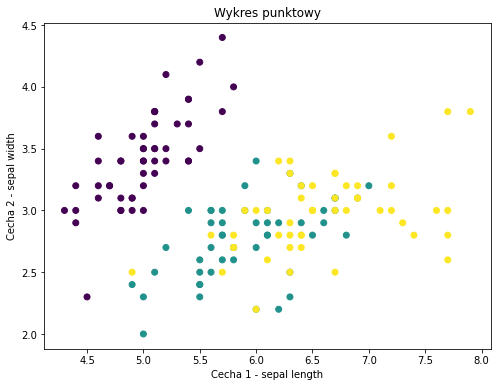

In [ ]:
# Wykres punktowy
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Wykres punktowy')
plt.xlabel('Cecha 1 - sepal length')
plt.ylabel('Cecha 2 - sepal width')
plt.show()

##Wykres w bibliotece plotly

In [ ]:
df = pd.DataFrame(data=np.c_[data, target], columns=['sepal_length', 'sepal_width', 'target'])
px.scatter(df, x='sepal_length', y='sepal_width', color='target', width=800)

#K-najbliższych sąsiadów

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(data, target)

KNeighborsClassifier()

#Wykres granic decyzyjnych

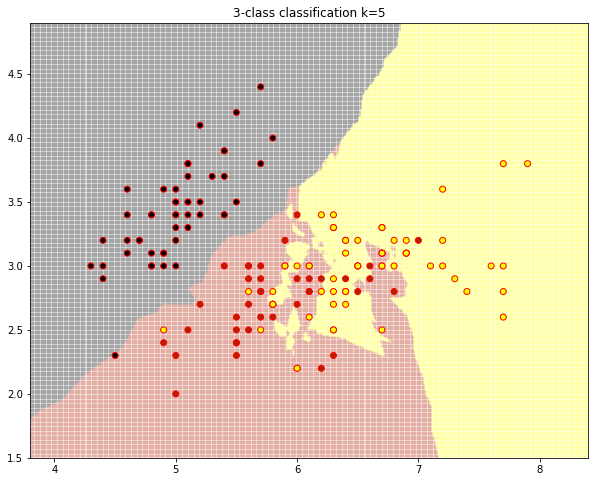

In [ ]:
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha = 0.1)
plt.scatter(data[:,0], data[:,1], c=target, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('3-class classification k=5')
plt.show()

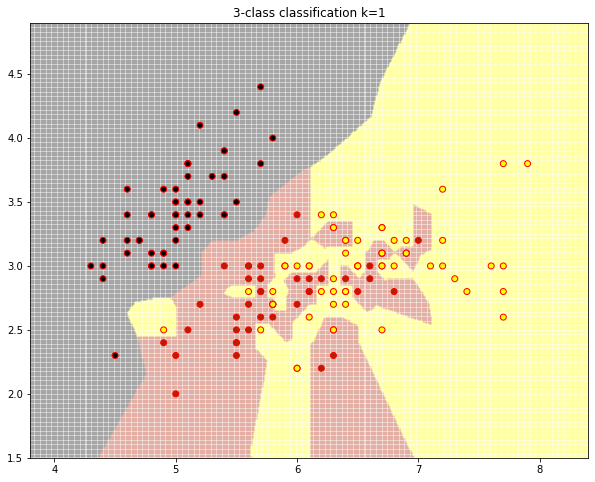

In [ ]:
def plot_dec_bound(n_neighbors = 1):
  classifier = KNeighborsClassifier(n_neighbors = n_neighbors)
  classifier.fit(data, target)

  x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
  y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z = classifier.predict(mesh)
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(10, 8))
  plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha = 0.1)
  plt.scatter(data[:,0], data[:,1], c=target, cmap='gnuplot', edgecolors='r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f'3-class classification k={n_neighbors}')
  plt.show()

plot_dec_bound()

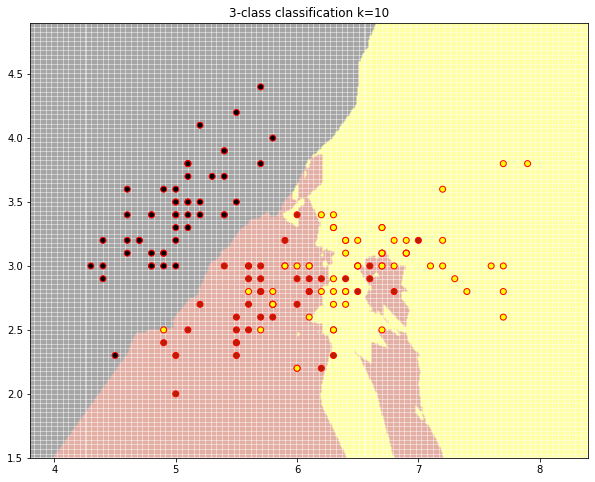

In [ ]:
plot_dec_bound(10)

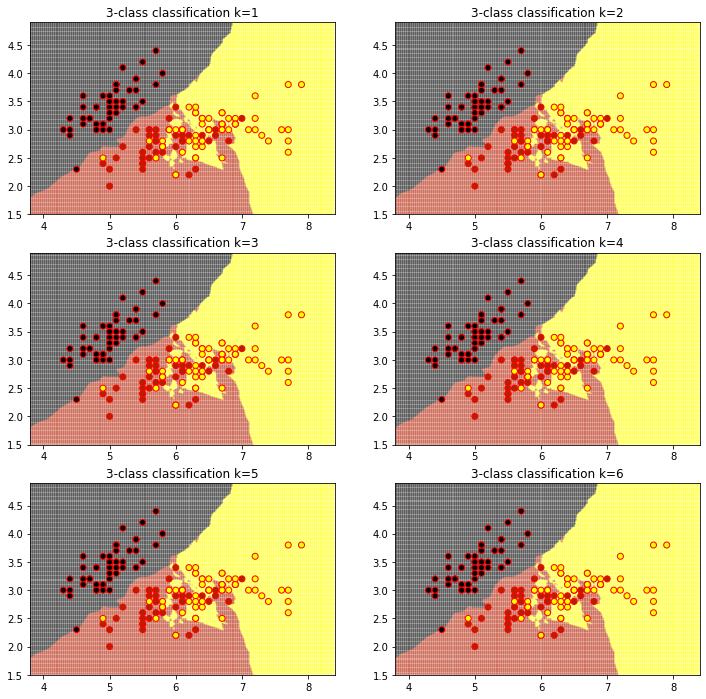

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(1,7):
  plt.subplot(3, 2, i)
  clf = KNeighborsClassifier(n_neighbors=i)
  clf.fit(data, target)

  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
  mesh = np.c_[xx.ravel(), yy.ravel()]
  Z = classifier.predict(mesh)
  Z = Z.reshape(xx.shape)

  plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha = 0.1)
  plt.scatter(data[:,0], data[:,1], c=target, cmap='gnuplot', edgecolors='r')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f'3-class classification k={i}')

plt.show()

